**Jake McRoberts  
July 9th, 2017  
Case Study: Retail Sales Data**

# Improve Demand Forecasting using Retail Sales Data

Python version used for analyses: 3.6.X

Data files: 
- sales.txt
- article_master.txt

Tasks:
1. Prepare and analyze the data to assure sufficient quality and suitability for the business case study.
2. Identify what is driving sales and which type of promotion has a stronger impact on sales.
3. Forecast sales (sold units) for the following month. 
4. Perform appropriate diagnostics to check whether your methods and results from above are reliable.

## 1. Import, clean, and wrangle sales data to ensure data quality and suitability for analysis

### Import Data

In [177]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# import transactional sales data of articles into a pandas dataframe
data_sales = pd.read_csv("sales.txt", sep = ";")

# import attribute data of sold articles
data_attribute = pd.read_csv("article_master.txt", sep = ";")

### Inspect Data

Verify data looks clean and suitable from a high level view of it.

In [178]:
data_sales.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2
0,Germany,AA1821,62,31.95,25.95,0.812207,2014-12-28,1,0
1,Germany,AA1821,29,31.95,22.95,0.718310,2015-01-04,0,0
2,Germany,AA1821,58,31.95,28.95,0.906103,2015-01-11,0,0
3,Germany,AA1821,49,31.95,29.95,0.937402,2015-01-18,0,0
4,Germany,AA1821,883,31.95,24.95,0.780908,2015-01-25,0,0


In [179]:
data_sales.shape

(81426, 9)

Check for any NaN values in sales transactional data.

In [180]:
data_sales.isnull().values.any()

False

In [181]:
data_sales.describe()

,sales,regular_price,current_price,ratio,promo1,promo2
count,81426.000000,81426.000000,81426.000000,81426.000000,81426.000000,81426.000000
mean,57.048375,52.620695,28.356811,0.544464,0.065041,0.005060
std,88.506045,35.549601,22.704746,0.192692,0.246599,0.070953
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000
50%,26.000000,41.450000,20.950000,0.523526,0.000000,0.000000
75%,65.000000,79.950000,37.950000,0.697322,0.000000,0.000000
max,898.000000,197.950000,197.950000,1.000000,1.000000,1.000000


In [182]:
data_attribute.head()

,article,category,productgroup,cost
0,OC6355,TRAINING,SHOES,13.29
1,AP5568,TRAINING,SHORTS,2.29
2,CB8861,GOLF,HARDWARE ACCESSORIES,1.70
3,LI3529,RUNNING,SHOES,9.00
4,GG8661,RELAX CASUAL,SHOES,9.60


In [183]:
data_attribute.shape

(476, 4)

Check for any NaN values in sales attribute data.

In [184]:
data_attribute.isnull().values.any()

False

In [185]:
data_attribute.describe()

,cost
count,476.00000
mean,5.17792
std,3.36282
min,0.40000
25%,2.60000
50%,4.25000
75%,7.90000
max,19.80000


From a high level perspective, the data looks okay. There aren't any NaN's in either dataset and the size of the dataframes makes sense based on the size of the raw data in the text files. The descriptive statistics on the data looks great as well.

Use pandas `merge` function to combine the transactional sales data with the sales attribute data like a SQL join. Use an inner join since I want to add cost data (if there is any) for the given transactional data. If there isn't any cost data, then I will not use the transactional sales data. I'll try a left join first to see if there are any cases where there is transactional data but not cost data for a given article. If there aren't many cases like this, then I will go ahead with the inner join.

In [253]:
data_leftJoined = pd.merge(data_sales, data_attribute, how = 'left', on = 'article')
data_leftJoined

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,category,productgroup,cost
0,Germany,AA1821,62,31.95,25.95,0.812207,2014-12-28,1,0,RUNNING,T-SHIRTS,3.2
1,Germany,AA1821,29,31.95,22.95,0.718310,2015-01-04,0,0,RUNNING,T-SHIRTS,3.2
2,Germany,AA1821,58,31.95,28.95,0.906103,2015-01-11,0,0,RUNNING,T-SHIRTS,3.2
3,Germany,AA1821,49,31.95,29.95,0.937402,2015-01-18,0,0,RUNNING,T-SHIRTS,3.2
4,Germany,AA1821,883,31.95,24.95,0.780908,2015-01-25,0,0,RUNNING,T-SHIRTS,3.2
5,Germany,AA1821,43,31.95,31.95,1.000000,2015-02-01,0,0,RUNNING,T-SHIRTS,3.2
6,Germany,AA1821,67,31.95,28.95,0.906103,2015-02-08,0,0,RUNNING,T-SHIRTS,3.2
7,Germany,AA1821,173,31.95,15.95,0.499218,2015-02-15,0,0,RUNNING,T-SHIRTS,3.2
8,Germany,AA1821,53,31.95,22.95,0.718310,2015-02-22,0,0,RUNNING,T-SHIRTS,3.2
9,Germany,AA1821,19,31.95,26.95,0.843505,2015-03-01,0,0,RUNNING,T-SHIRTS,3.2


In [254]:
data_leftJoined.describe()

,sales,regular_price,current_price,ratio,promo1,promo2,cost
count,81426.000000,81426.000000,81426.000000,81426.000000,81426.000000,81426.000000,81303.000000
mean,57.048375,52.620695,28.356811,0.544464,0.065041,0.005060,5.002254
std,88.506045,35.549601,22.704746,0.192692,0.246599,0.070953,3.352216
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000,0.400000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000,2.400000
50%,26.000000,41.450000,20.950000,0.523526,0.000000,0.000000,4.000000
75%,65.000000,79.950000,37.950000,0.697322,0.000000,0.000000,7.700000
max,898.000000,197.950000,197.950000,1.000000,1.000000,1.000000,19.800000


Investigate why there are less cost data points (count) than the other columns of data - likely due to there not being cost data for an article that had transactional sales data.

In [255]:
data_leftJoined[data_leftJoined.isnull().values]

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,category,productgroup,cost
24231,Austria,IO7646,17,25.95,16.95,0.653179,2014-12-28,1,0,NaN,NaN,NaN
24231,Austria,IO7646,17,25.95,16.95,0.653179,2014-12-28,1,0,NaN,NaN,NaN
24231,Austria,IO7646,17,25.95,16.95,0.653179,2014-12-28,1,0,NaN,NaN,NaN
24232,Austria,IO7646,2,25.95,17.95,0.691715,2015-01-04,0,0,NaN,NaN,NaN
24232,Austria,IO7646,2,25.95,17.95,0.691715,2015-01-04,0,0,NaN,NaN,NaN
24232,Austria,IO7646,2,25.95,17.95,0.691715,2015-01-04,0,0,NaN,NaN,NaN
24233,Austria,IO7646,2,25.95,25.95,1.000000,2015-01-11,0,0,NaN,NaN,NaN
24233,Austria,IO7646,2,25.95,25.95,1.000000,2015-01-11,0,0,NaN,NaN,NaN
24233,Austria,IO7646,2,25.95,25.95,1.000000,2015-01-11,0,0,NaN,NaN,NaN
24234,Austria,IO7646,1,25.95,22.95,0.884393,2015-01-18,0,0,NaN,NaN,NaN


As expected, there are NaN's for missing cost data for an article that had cost data. I can fix this by replacing the NaN's with 0's. However, I am going to go forward with the inner join so for all of the data I have both transactional sales and cost data.

In [257]:
data_leftJoined.fillna(0, inplace = True)
data_leftJoined[data_leftJoined.isnull().values]

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,category,productgroup,cost


In [258]:
data_leftJoined.describe()

,sales,regular_price,current_price,ratio,promo1,promo2,cost
count,81426.000000,81426.000000,81426.000000,81426.000000,81426.000000,81426.000000,81426.000000
mean,57.048375,52.620695,28.356811,0.544464,0.065041,0.005060,4.994698
std,88.506045,35.549601,22.704746,0.192692,0.246599,0.070953,3.355312
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000,0.000000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000,2.400000
50%,26.000000,41.450000,20.950000,0.523526,0.000000,0.000000,3.950000
75%,65.000000,79.950000,37.950000,0.697322,0.000000,0.000000,7.700000
max,898.000000,197.950000,197.950000,1.000000,1.000000,1.000000,19.800000


Perform inner join of sales and attribute data.

In [259]:
data_joined = pd.merge(data_sales, data_attribute, how = 'inner', on = 'article')
data_joined

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,category,productgroup,cost
0,Germany,AA1821,62,31.95,25.95,0.812207,2014-12-28,1,0,RUNNING,T-SHIRTS,3.2
1,Germany,AA1821,29,31.95,22.95,0.718310,2015-01-04,0,0,RUNNING,T-SHIRTS,3.2
2,Germany,AA1821,58,31.95,28.95,0.906103,2015-01-11,0,0,RUNNING,T-SHIRTS,3.2
3,Germany,AA1821,49,31.95,29.95,0.937402,2015-01-18,0,0,RUNNING,T-SHIRTS,3.2
4,Germany,AA1821,883,31.95,24.95,0.780908,2015-01-25,0,0,RUNNING,T-SHIRTS,3.2
5,Germany,AA1821,43,31.95,31.95,1.000000,2015-02-01,0,0,RUNNING,T-SHIRTS,3.2
6,Germany,AA1821,67,31.95,28.95,0.906103,2015-02-08,0,0,RUNNING,T-SHIRTS,3.2
7,Germany,AA1821,173,31.95,15.95,0.499218,2015-02-15,0,0,RUNNING,T-SHIRTS,3.2
8,Germany,AA1821,53,31.95,22.95,0.718310,2015-02-22,0,0,RUNNING,T-SHIRTS,3.2
9,Germany,AA1821,19,31.95,26.95,0.843505,2015-03-01,0,0,RUNNING,T-SHIRTS,3.2


In [260]:
data_joined.describe()

,sales,regular_price,current_price,ratio,promo1,promo2,cost
count,81303.000000,81303.000000,81303.000000,81303.000000,81303.000000,81303.000000,81303.000000
mean,57.107868,52.661044,28.377229,0.544421,0.065041,0.005067,5.002254
std,88.552281,35.561332,22.714819,0.192656,0.246599,0.071006,3.352216
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000,0.400000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000,2.400000
50%,26.000000,41.950000,21.950000,0.523526,0.000000,0.000000,4.000000
75%,65.000000,79.950000,37.950000,0.697322,0.000000,0.000000,7.700000
max,898.000000,197.950000,197.950000,1.000000,1.000000,1.000000,19.800000


Verify there are no NaN values.

In [264]:
data_joined.isnull().values.any()

False

There are no NaN values. Joined data looks good to move on to exploratory data analysis by way of plotting. It will be very useful to visualize the different categories of sales data.

### Plot Data

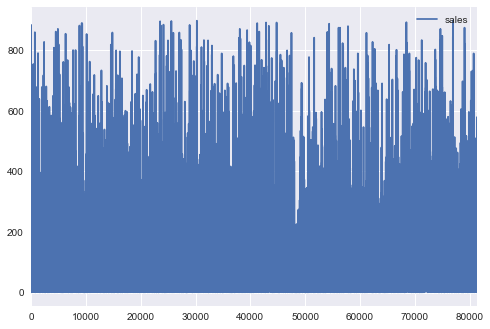

In [231]:
plt.figure()
data_joined.plot(y = 'sales')
plt.show()

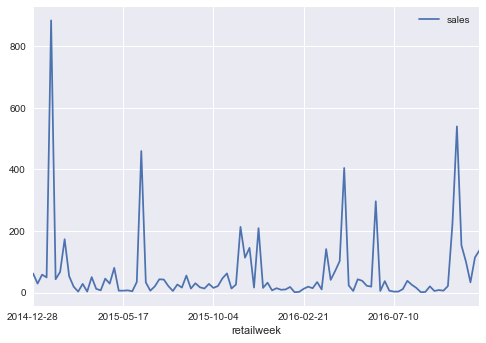

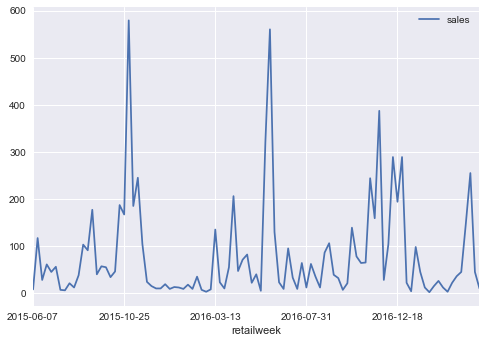

In [187]:
plt.figure()
data_joined[0:100].plot(x = 'retailweek', y = 'sales')
data_joined[-100:-1].plot(x = 'retailweek', y = 'sales')
plt.show()

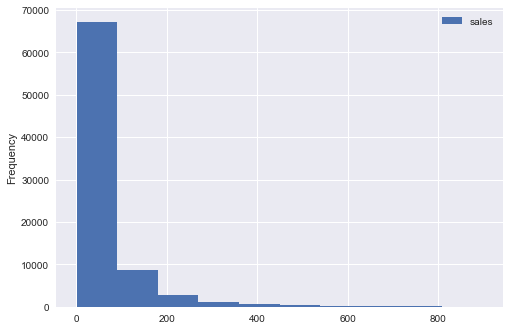

In [188]:
plt.figure()
data_joined.plot(y = 'sales', kind = 'hist')
plt.show()

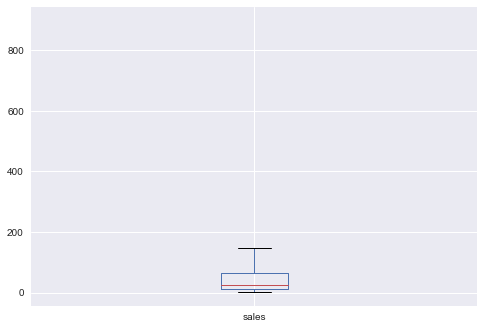

In [189]:
plt.figure()
data_joined.plot(y = ['sales'], kind = 'box')
plt.show()

Sales data looks as expected; there are a lot of outliers likely at high sale times (like Christmas / winter holiday and summer before school starts). The sales data is pretty cyclical in addition to being heavily skewed with the vast majority of weeks with sales of less than 100 items for each item type.

Examine price data now.

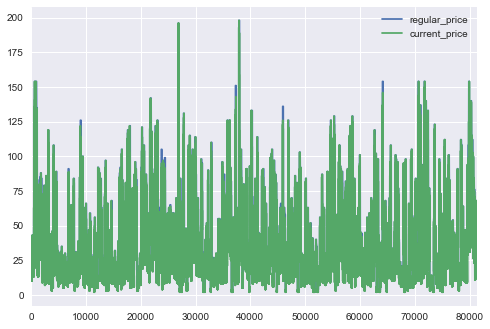

In [190]:
plt.figure()
data_joined.plot(y = ['regular_price', 'current_price'])
plt.show()

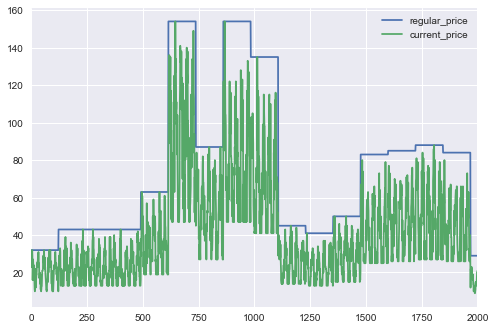

In [191]:
plt.figure()
data_joined[0:2000].plot(y = ['regular_price', 'current_price'])
plt.show()

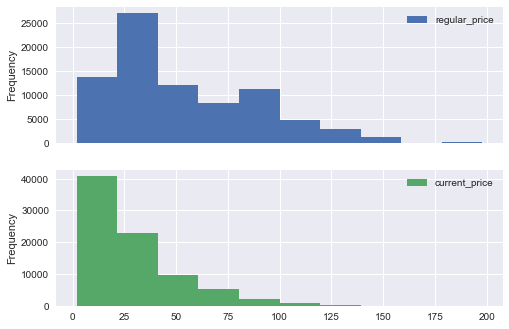

In [192]:
plt.figure()
data_joined.plot(y = ['regular_price', 'current_price'], kind = 'hist', subplots = True)
plt.show()

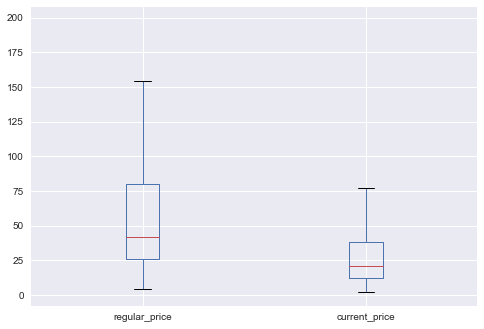

In [193]:
plt.figure()
data_joined.plot(y = ['regular_price', 'current_price'], kind = 'box')
plt.show()

Pricing data (regular price and current price) both look as expected; the regular price is higher than the current price (indicating that discounts, like promo1 and/or promo2, reduce the price). Both price datasets are skewed but the regular price looks like it could be closer to a normal distribution. The majority of items that are sold are priced under 75 euro.

Look into the ratio data (`ratio = current_price / regular_price`).

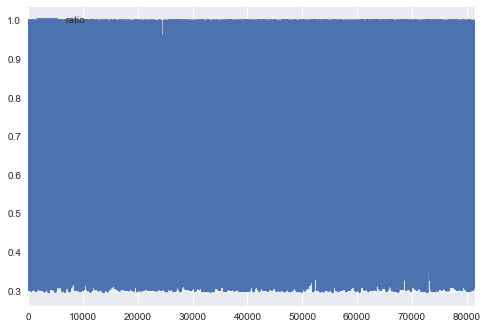

In [194]:
plt.figure()
data_joined.plot(y = 'ratio')
plt.show()

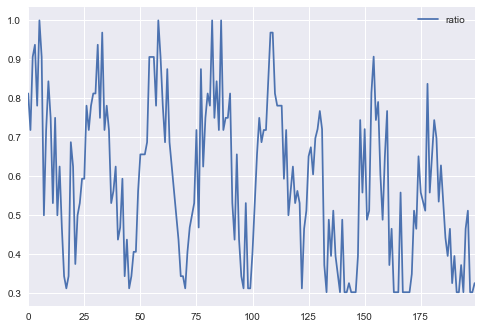

In [195]:
plt.figure()
data_joined[0:200].plot(y = 'ratio')
plt.show()

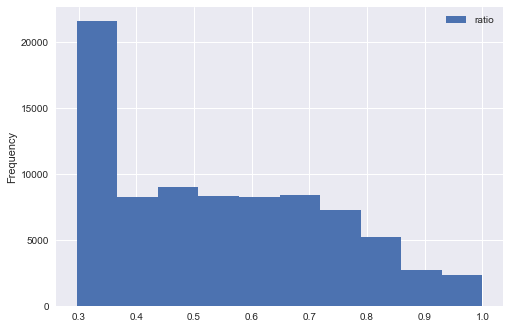

In [196]:
plt.figure()
data_joined.plot(y = 'ratio', kind = 'hist')
plt.show()

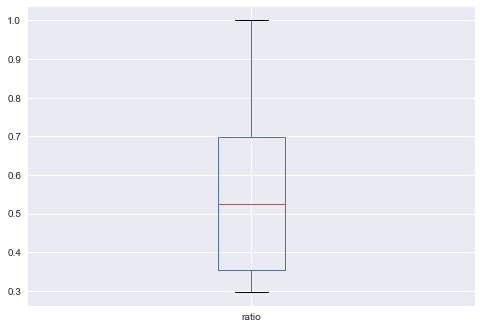

In [197]:
plt.figure()
data_joined.plot(y = ['ratio'], kind = 'box')
plt.show()

Ratio data is similarly skewed like the sales and pricing data - the cyclical nature of pricing items is very apparent in the data when zooming in on a smaller sample of the ratio data.

Examine the promo data (1 and 2) next.

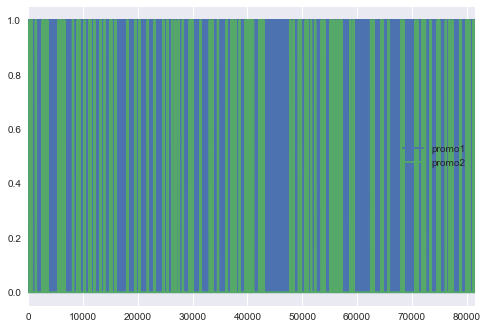

In [198]:
plt.figure()
data_joined.plot(y = ['promo1', 'promo2'])
plt.show()

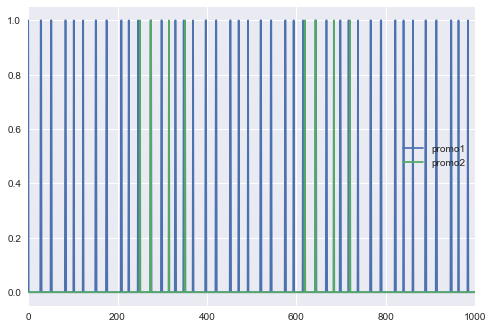

In [199]:
plt.figure()
data_joined[0:1000].plot(y = ['promo1', 'promo2'])
plt.show()

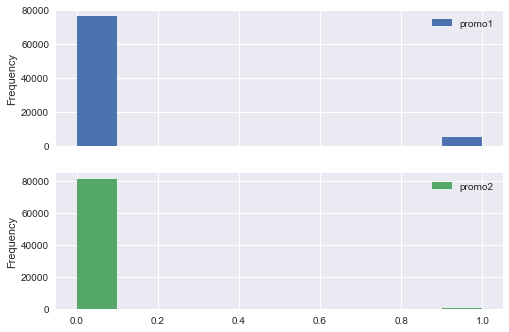

In [200]:
plt.figure()
data_joined.plot(y = ['promo1', 'promo2'], kind = 'hist', subplots = True)
plt.show()

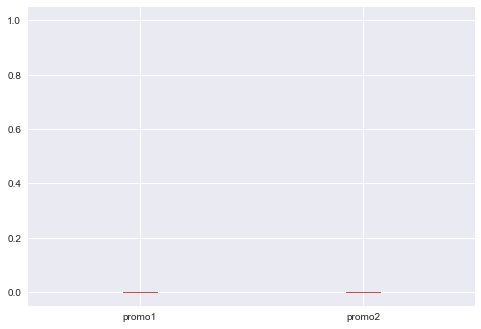

In [201]:
plt.figure()
data_joined.plot(y = ['promo1', 'promo2'], kind = 'box')
plt.show()

Plotting the promotion data doesn't yield much when looking for a distribution since the values are either '0' or '1' at all times. It is good to confirm that the data is clean.

Inspect the actual cost data from the second text data file holding attribute data for each article of clothing.

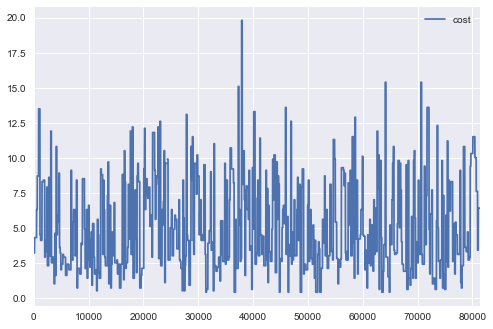

In [232]:
plt.figure()
data_joined.plot(y = 'cost')
plt.show()

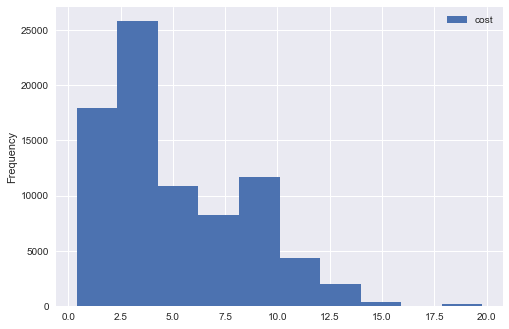

In [265]:
plt.figure()
data_joined.plot(y = 'cost', kind = 'hist')
plt.show()

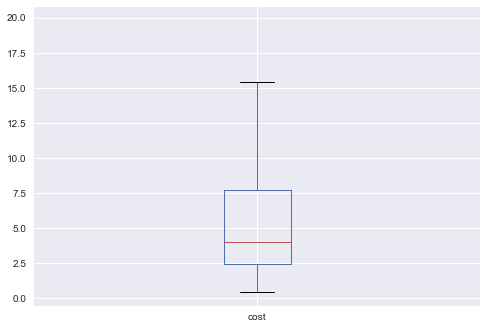

In [270]:
plt.figure()
data_joined.plot(y = 'cost', kind = 'box')
plt.show()

Cost data looks reasonable; there aren't any large outliers. There is one item that costs roughly 20 euro. The data is skewed similarly to the other numerical data, although the shape is closest to the price data. I'll examine the potential outlier to see if it seems like a real data point.

In [272]:
data_joined[data_joined['cost'] > 17]

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,category,productgroup,cost
37761,Germany,NE7168,31,197.95,73.95,0.373579,2014-12-28,1,0,PORSCHE,SHOES,19.8
37762,Germany,NE7168,22,197.95,125.95,0.636272,2015-01-04,0,0,PORSCHE,SHOES,19.8
37763,Germany,NE7168,12,197.95,145.95,0.737307,2015-01-11,0,0,PORSCHE,SHOES,19.8
37764,Germany,NE7168,3,197.95,157.95,0.797929,2015-01-18,0,0,PORSCHE,SHOES,19.8
37765,Germany,NE7168,28,197.95,130.95,0.661531,2015-01-25,0,0,PORSCHE,SHOES,19.8
37766,Germany,NE7168,13,197.95,141.95,0.717100,2015-02-01,0,0,PORSCHE,SHOES,19.8
37767,Germany,NE7168,7,197.95,192.95,0.974741,2015-02-08,0,0,PORSCHE,SHOES,19.8
37768,Germany,NE7168,60,197.95,136.95,0.691841,2015-02-15,0,0,PORSCHE,SHOES,19.8
37769,Germany,NE7168,51,197.95,117.95,0.595858,2015-02-22,0,0,PORSCHE,SHOES,19.8
37770,Germany,NE7168,22,197.95,132.95,0.671634,2015-03-01,0,0,PORSCHE,SHOES,19.8


The data point above is a real data point. There are 123 transactional sales data points for the Porsche shoes. I know that adidas has a relationship with Porsche for branding of clothing and it would make sense for it to be more expensive that a non-Porsche branded piece of clothing considering the Porsche brand.

Overall, the data looks great. I'll move on to digging into the data to find what drives sales and if the promotions provide value add to sales numbers while keeping profits high.

## 2. Identify what is driving sales and which type of promotion has a stronger impact on sales.

### Transactional Sales Data Correlation Matrix

Create a correlation matrix to see how each of the promotions and ratio play into the number of sales.

In [273]:
# calculate correlation matrix
corr_sales = data_joined.corr()
corr_sales

,sales,regular_price,current_price,ratio,promo1,promo2,cost
sales,1.000000,1.839857e-02,-0.102018,-0.257473,1.032704e-01,0.010210,2.733576e-02
regular_price,0.018399,1.000000e+00,0.842917,-0.042704,2.757147e-18,0.010322,9.430526e-01
current_price,-0.102018,8.429173e-01,1.000000,0.408878,6.875311e-02,0.022557,7.916877e-01
ratio,-0.257473,-4.270398e-02,0.408878,1.000000,1.518774e-01,0.028358,-4.497662e-02
promo1,0.103270,2.757147e-18,0.068753,0.151877,1.000000e+00,0.053529,-2.981691e-18
promo2,0.010210,1.032208e-02,0.022557,0.028358,5.352861e-02,1.000000,-1.102974e-02
cost,0.027336,9.430526e-01,0.791688,-0.044977,-2.981691e-18,-0.011030,1.000000e+00


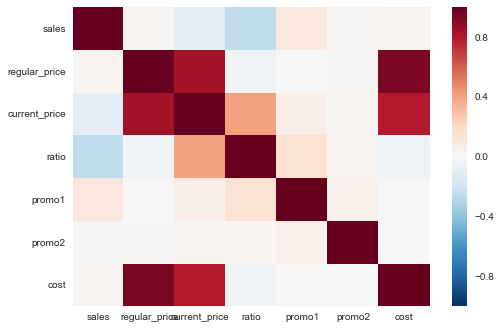

In [274]:
# plot the heatmap
sns.heatmap(corr_sales)
plt.show()

The two price variables (regular and current price) are heavily correlated which makes a lot of sense. Regular price is heavily correlated with cost which makes perfect sense and current price is also positively correlated with cost. Ratio looks to be moderately correlated with the current_price which again makes sense since it is the results of regular_price/current_price. Ratio looks to be moderately negatively correlated with sales which would imply that as teh ratio goes down, the sales go up; this intuitively makes sense since reduced prices hypothetically make for more purchases.

Lastly, it looks like promo1 is loosely correlated with sales; more so than promo2's correlation with sales.

At this point, it isn't very clear which promotion drives sales more. I would hazard a guess that promo1 does influence sales more based on the more positive correlation. As far as pricing goes, it looks like the like there is a moderate correlation between reducing the ratio (decreasing the current_price) and increasing sales.

I think the best approach would be to prepare the joined sales data for applying machine learning for a numerical output (not a classifer). It looks like some form of ordinary least squares regression, logistic regression, lasso regression, ARIMA, or random forest regression will be the best way to approach this problem.

### Machine Learning: Regression

Steps required for adequately performing machine learning on sales data using a Pipeline for evaluating many different combinations of features/algorithms and using proper validation technique(s) like cross-validation:
1. Feature creation (Ideas listed below for creating new variables to help with machine learning, **re-run correlation matrix with the new features**):
    - month (1 through 12)
    - season (1 through 4: winter, spring, summer, fall)
    - type of clothing (would need to tie in attribute data)
    - countryNumber (convert country variable to a number)
2. Transform data (feature scaling, etc.)
3. Dimensionality reduction (PCA)
4. Feature selection (k-best, k-means, etc.)
5. Pipeline (evaluate different combinations and machine learning algorithms while using cross-validation methods to ensure valid results)
6. Evaluate results using the following metrics: accuracy, precision, recall

##### 1. Feature Creation

##### 2. Transform Data

##### 3. - 6. Use a pipeline for finding and evaluating the best dimensionality reduction, feature selection, and machine learning algorithm